In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahistapatel96/bankadditionalfullcsv")

print("Path to dataset files:", path)

100%|██████████| 391k/391k [00:00<00:00, 5.96MB/s]

Extracting files...
Path to dataset files: /Users/lucia/.cache/kagglehub/datasets/sahistapatel96/bankadditionalfullcsv/versions/1


In [4]:
import os
import pandas as pd

# Cargar el archivo CSV desde el directorio
csv_file = os.path.join(path, 'bank-additional-full.csv')  # Reemplaza con el nombre exacto del archivo si es diferente
bank_data = pd.read_csv(csv_file, delimiter=';')

# Seleccionar las columnas específicas
bank_data = bank_data[['age', 'default', 'cons.price.idx', 'cons.conf.idx', 'y']]

# Visualizar las primeras filas
print(bank_data.head())


   age  default  cons.price.idx  cons.conf.idx   y
0   56       no          93.994          -36.4  no
1   57  unknown          93.994          -36.4  no
2   37       no          93.994          -36.4  no
3   40       no          93.994          -36.4  no
4   56       no          93.994          -36.4  no


In [5]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [6]:
# Split the data into features (X) and target (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = rf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8906287933964554


This is a pretty good score! However, we may be able to do better by optimizing our hyperparameters. 

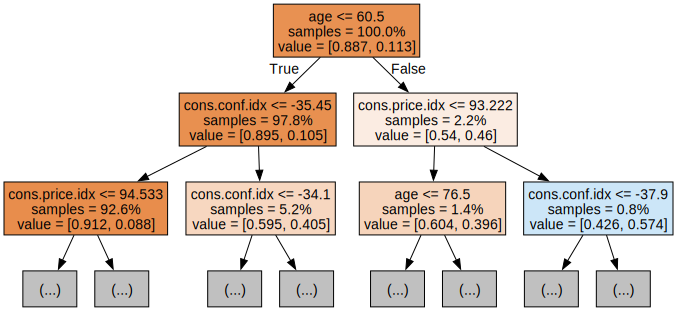

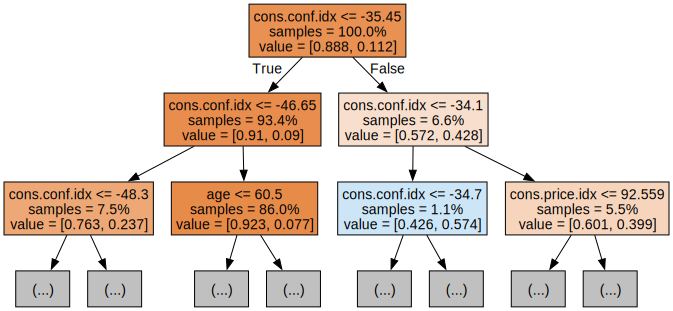

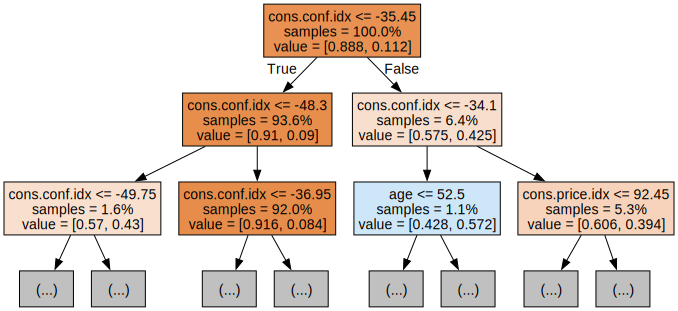

In [10]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [11]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9179ab50d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9179a88f10>})

In [12]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 1, 'n_estimators': 103}


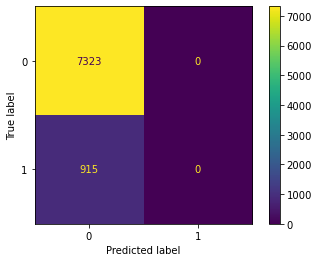

In [13]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [18]:
# Definir el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Usar 'weighted' para varias clases
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8851663025006069
Precision: 0.8641979187731957
Recall: 0.26994535519125684


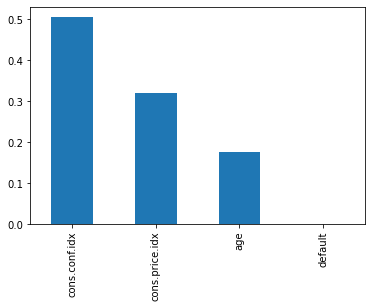

In [19]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();